<a href="https://colab.research.google.com/github/swenytheone/data_analysis_finance/blob/main/sharp_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = yf.download(["SPY", "AAPL"], start="2020-01-01", end="2022-08-30")
closes = data["Adj Close"]
spy_returns = closes.SPY.pct_change().dropna()
aapl_returns = closes.AAPL.pct_change().dropna()

[*********************100%***********************]  2 of 2 completed


The Sharpe ratio tells you the “risk-adjusted” return of an investment.

In other words, “how much return do you get for every unit of risk you take.”

It’s a great way to compare strategies because it normalizes their returns.


This function does 3 things:

1. Subtracts an adjustment factor
2. Divides the mean return by the standard deviation of return
3. Multiplies by the square root of the number of trading days in the year

This returns the annualized Sharpe ratio!


In [9]:
def sharp_ratio(returns, adjustment_factor=0.0):
  """
  Determine the sharp ratio of a strategy
  
  Parameters
  ----------
    returns : pd.series or np.ndarray
      Daily return of a strategy, noncummulative.
    adjusment_factor : int, float
      Constantly daily benchmark return throughout the period.

  Returns
  ------
    sharp_ratio : float
  
  Note
  ---
    https://en.wikipedia.org/wiki/Sharpe_ratio
  """
  
  returns_risk_adj = returns - adjustment_factor
  return (
          returns_risk_adj.mean() / returns_risk_adj.std()
  ) * np.sqrt(252)

The Sharpe ratio for AAPL is higher than for SPY. That means you got more return for every unit of risk.

In [15]:
sharp_ratio(spy_returns), sharp_ratio(aapl_returns)

(0.5076771282289056, 0.9896892191514661)

This makes sense:

When stocks rally, standard deviation drops, pushing the Sharpe ratio up.

The opposite is true too.

Let’s see the distribution of these values.

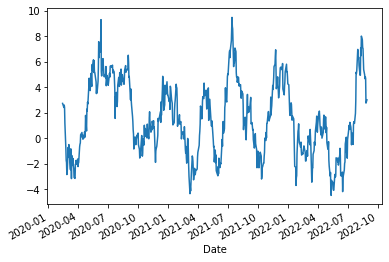

In [10]:
aapl_returns.rolling(30).apply(sharp_ratio).plot()

Use a histogram to visualize the distribution of rolling Sharpe ratios.

In the case of AAPL, there is a long tail of positive Sharpe ratios.

That also makes sense:

AAPL had a lot of positive returns over the last 2.5 years.

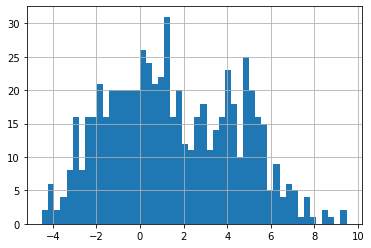

In [11]:
aapl_returns.rolling(30).apply(sharp_ratio).hist(bins=50)


Finally, let’s see how the Sharpe ratios of AAPL and SPY compare through time.

Was AAPL always a better risk adjusted return?

It doesn’t look like AAPL consistently beats SPY over every 30 day period.

But over the entire 2-year period, it does.

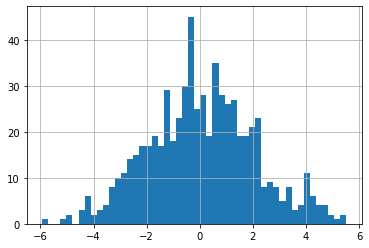

In [12]:
( aapl_returns.rolling(30).apply(sharp_ratio) - spy_returns.rolling(30).apply(sharp_ratio)).hist(bins=50)